# Discrete Anomaly Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns
%matplotlib inline

import main

from acquire import get_log_data
from prepare import prep_log_data, ip_statistics, ip_status_proabilities, eda_log_data

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_log_data()
df = prep_log_data(df)

In [3]:
df.head()

,ip,request_method,status,size,destination,request_agent,agent_name,size_mb,download_size,ip_count,ip_probability
timestamp,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,python,0.488753,Low,11999,0.85842
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,python,0.003396,Low,11999,0.85842
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,python,0.486472,Low,11999,0.85842
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,python,0.486377,Low,11999,0.85842
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,python,0.488246,Low,11999,0.85842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13978 entries, 2019-04-16 19:34:42 to 2019-04-21 10:02:41
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ip              13978 non-null  object  
 1   request_method  13978 non-null  object  
 2   status          13978 non-null  int64   
 3   size            13978 non-null  int64   
 4   destination     25 non-null     object  
 5   request_agent   13978 non-null  object  
 6   agent_name      13978 non-null  object  
 7   size_mb         13978 non-null  float64 
 8   download_size   13978 non-null  category
 9   ip_count        13978 non-null  int64   
 10  ip_probability  13978 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 1.2+ MB


In [5]:
ip_statistics(df)

,ip,ip_count,ip_probability
0,97.105.19.58,11999,0.858420
1,173.173.113.51,1059,0.075762
2,72.181.113.170,613,0.043855
3,72.181.105.81,246,0.017599
4,68.201.219.223,21,0.001502
5,24.26.242.9,21,0.001502
6,52.87.230.102,2,0.000143
7,35.175.171.137,2,0.000143
8,70.121.214.34,2,0.000143
9,95.31.16.121,1,0.000072


## 1. Use basic probability to identify anomalous request methods. You will want to make sure the text is normalized in order to reduce the noise.

In [6]:
train = df.loc['2019-04-16 19:34:42':'2019-04-17 12:55:14'][['ip','request_method','status','size','destination','request_agent','size_mb']]

In [7]:
train = train.fillna(0)

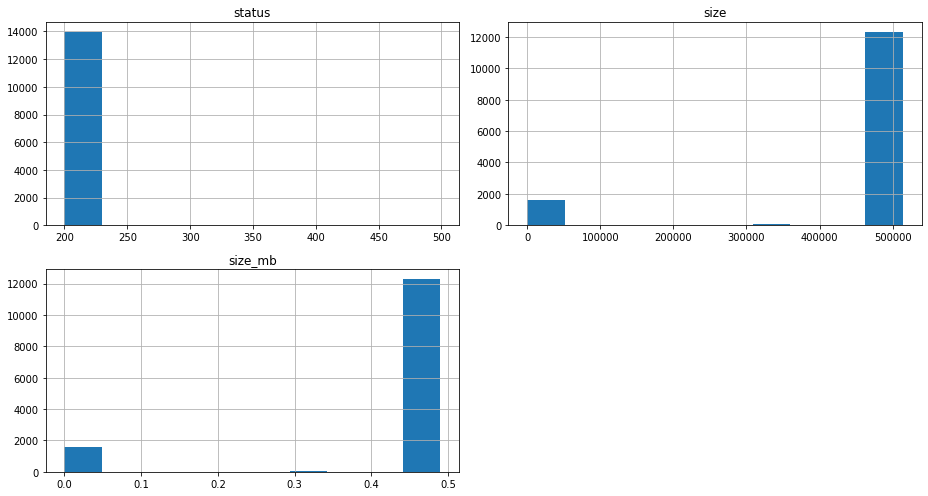

In [8]:
train.hist(figsize=(13, 7))
plt.tight_layout();

In [9]:
ip_statistics(train)

,ip,ip_count,ip_probability
0,97.105.19.58,11998,0.858595
1,173.173.113.51,1059,0.075784
2,72.181.113.170,613,0.043867
3,72.181.105.81,246,0.017604
4,68.201.219.223,21,0.001503
5,24.26.242.9,21,0.001503
6,52.87.230.102,2,0.000143
7,35.175.171.137,2,0.000143
8,70.121.214.34,2,0.000143
9,3.92.201.136,1,0.000072


In [10]:
df = eda_log_data(train, df)

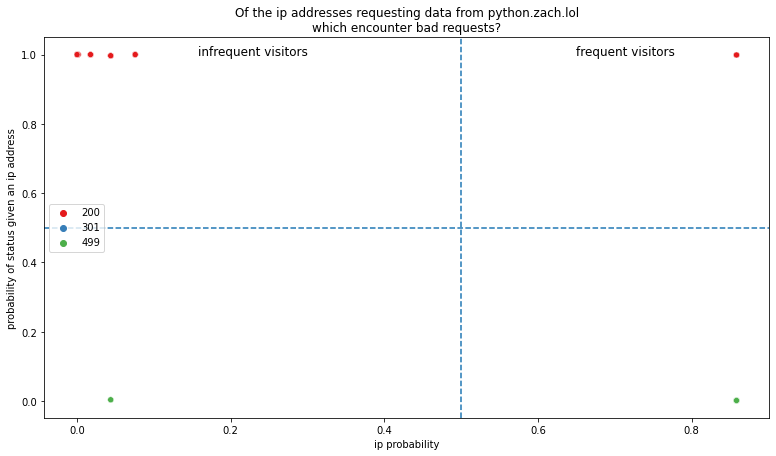

In [11]:
plt.figure(figsize=(13, 7))
sns.scatterplot(df.ip_probability,
                df.prob_status_given_ip,
                hue=df.status,
                palette='Set1')

plt.title('Of the ip addresses requesting data from python.zach.lol\nwhich encounter bad requests?')
plt.xlabel('ip probability')
plt.ylabel('probability of status given an ip address')
plt.axhline(y=.5, linestyle='--')
plt.axvline(x=.5, linestyle='--')
plt.legend(loc='center left')
plt.text(0.3, 1.01, 'infrequent visitors', horizontalalignment='right', verticalalignment='center', fontsize=12)
plt.text(0.65, 1.01, 'frequent visitors', horizontalalignment='left', verticalalignment='center', fontsize=12);

In [12]:
train.head()

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python-requests/2.21.0,0.003396
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python-requests/2.21.0,0.486472
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python-requests/2.21.0,0.486377
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python-requests/2.21.0,0.488246


In [13]:
df['download_size'] = pd.cut(df.size_mb, 3, labels=['Low', 'Average', 'High'])

In [15]:
df.head()

,ip,request_method,status,size,destination,request_agent,agent_name,size_mb,download_size,ip_count,ip_probability,ip_status_count,prob_status_given_ip
timestamp,,,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,python,0.488753,Low,11999,0.85842,11984.0,0.998833
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,python,0.003396,Low,11999,0.85842,11984.0,0.998833
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,python,0.486472,Low,11999,0.85842,11984.0,0.998833
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,python,0.486377,Low,11999,0.85842,11984.0,0.998833
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,python,0.488246,Low,11999,0.85842,11984.0,0.998833


In [58]:
df.ip.value_counts()

97.105.19.58      11999
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
52.87.230.102         2
35.175.171.137        2
70.121.214.34         2
95.31.16.121          1
52.90.165.200         1
97.105.15.120         1
95.31.18.119          1
54.172.14.223         1
3.88.129.158          1
3.92.201.136          1
34.207.64.242         1
52.91.30.150          1
34.229.70.250         1
45.23.250.16          1
35.174.209.2          1
54.145.52.184         1
Name: ip, dtype: int64

In [56]:
df.request_method.value_counts()

GET /api/v1/sales HTTP/1.1                      12403
GET /api/v1/items HTTP/1.1                       1065
GET /api/v1/stores HTTP/1.1                       229
GET / HTTP/1.1                                    107
GET /documentation HTTP/1.1                       100
GET /favicon.ico HTTP/1.1                          26
GET /api/v1//api/v1/items HTTP/1.1                 11
GET /api/v1/items/api/v1/items HTTP/1.1             7
GET /api/v1/items/next_page HTTP/1.1                5
GET /api/v1/ HTTP/1.1                               4
GET /api/v1/sales/ HTTP/1.1                         3
GET /api/v1/store HTTP/1.1                          3
GET /api/v1/itemsitems HTTP/1.1                     3
GET /api/v1/sales/HTTP/1.1                          3
GET /api/v1items HTTP/1.1                           2
GET /api/v1//api/v1/items/next_page HTTP/1.1        1
GET /api/v1/items/HTTP/1.1                          1
GET /api/v1/I_DIDNT_DO_IT!!!! HTTP/1.1              1
GET /api/v1 HTTP/1.1        

<AxesSubplot:xlabel='ip_probability', ylabel='prob_status_given_ip'>

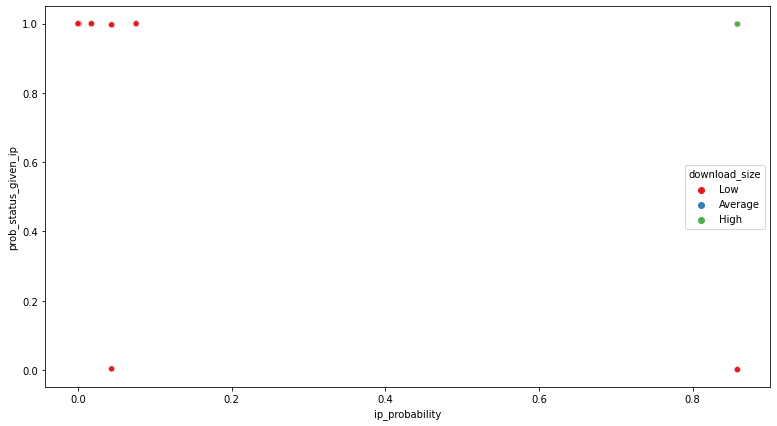

In [14]:
plt.figure(figsize=(13, 7))
sns.scatterplot(df.ip_probability,
                df.prob_status_given_ip,
                hue=df.download_size,
                palette='Set1')

In [50]:
df.groupby(by=['status', 'download_size']).size()

status  download_size
200     Low              13958
        Average              1
        High                 1
301     Low                  2
        Average              0
        High                 0
499     Low                 16
        Average              0
        High                 0
dtype: int64

<AxesSubplot:xlabel='agent_name', ylabel='ip_probability'>

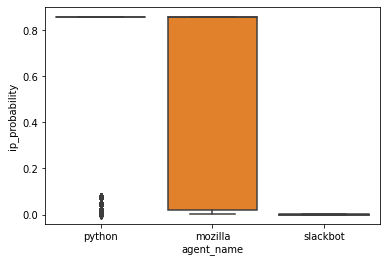

In [17]:
sns.boxplot(df.agent_name, df.ip_probability)

<AxesSubplot:xlabel='agent_name', ylabel='prob_status_given_ip'>

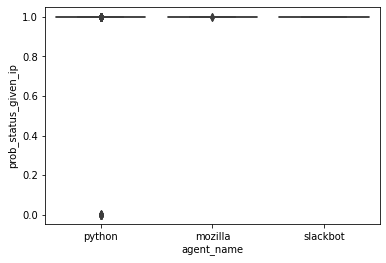

In [18]:
sns.boxplot(df.agent_name, df.prob_status_given_ip)

<AxesSubplot:xlabel='download_size', ylabel='agent_name'>

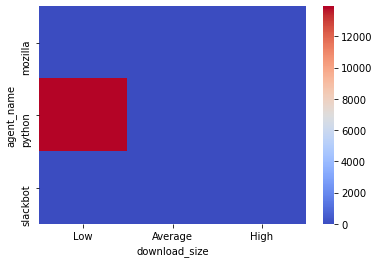

In [53]:
sns.heatmap(pd.crosstab(df.agent_name, df.download_size),
            cmap='coolwarm')

<AxesSubplot:xlabel='agent_name', ylabel='request_method'>

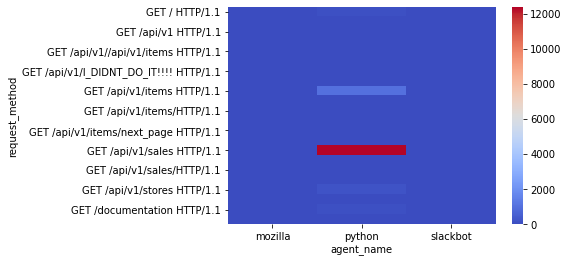

In [54]:
sns.heatmap(pd.crosstab(df.request_method, df.agent_name),
            cmap='coolwarm')

<AxesSubplot:xlabel='download_size', ylabel='request_method'>

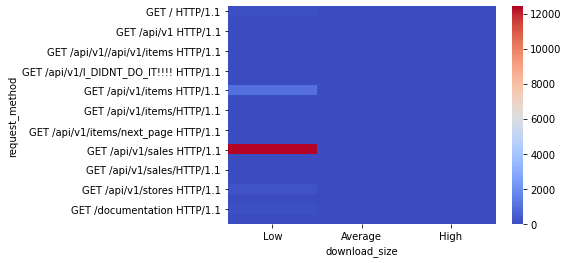

In [55]:
sns.heatmap(pd.crosstab(df.request_method, df.download_size),
            cmap='coolwarm')

<AxesSubplot:xlabel='download_size', ylabel='ip'>

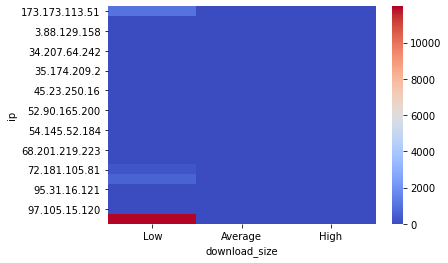

In [61]:
sns.heatmap(pd.crosstab(df.ip, df.download_size),
            cmap='coolwarm')